# Group Data Analysis Project

https://deepnote.com/@lauren-thomas-d7fc/Python-Group-Assignment-7bc46ca1-d592-45ab-a6c1-8cae6d45d82e

In this project, you and your group will work on analyzing data using Python. You will have to use some of the python skills you've seen in class and look back at the examples to help figure out how to proceed. 

I've given you a lot of help, though. And to help things further, we are going to use a very familiar situation: a Multples valuation. 

This is different from Multiples as you are probably used to them, though. I have downloaded data for every single firm traded on US exchanges (as of March 2021). We are going to use a "big data" approach to identify undervalued firms by considering all of them and focusing solely on financials to identify comparables. 

Step 1: Data cleaning. There is a lot of missing data and perhaps confusing data when we obtain a big dataset like this. We need to figure out what to do with it. 

Step 2: Filtering to get a comp set. We'll use filters in python to identify firms that are undervalued. The idea is to "hold all else equal" by gathering a set of firms with similar financials (margins, growth, ROIC, etc.) and then choose the lowest multiple in the group. This firm should be undervalued. The highest multiple firm is overvalued. 



In [1]:
# start by loading in our typical set of packages
import numpy as np  # NumPy
import pandas as pd  # pandas
import seaborn as sns
import matplotlib.pyplot as plt

import sys
print(sys.version)

3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]


In [2]:
# use pip to install the package 'xlrd'
# need it to read the excel file below
!pip install xlrd
import pandas as pd
df = pd.read_excel

In [13]:
fnamein = '../data/Company_Screening_Report_0yr_Lag.xls'

# use pandas to read the excel file. Open it if you like and check out why the parameters are set the way they are. 
df_mult0 = pd.read_excel(fnamein,sheet_name='Screening',header=None,na_values=['-','NM'],skiprows=8)
display(df_mult0)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,Public Company,Nasdaq Global Select (NasdaqGS),Internet and Direct Marketing Retail,Consumer Discretionary,1724.3,278.200,64.8,1857.8,...,22.4,1631.9,42.80,17.10,7.320,9.30,42.60,23.2,12.600,3.480
1,10X Capital Venture Acquisition Corp (NasdaqCM...,NasdaqCM:VCVC,Public Company,Nasdaq Capital Market (NasdaqCM),Asset Management and Custody Banks,Financials,253.8,0.060,25.2,0.0,...,0.0,252.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"10x Genomics, Inc. (NasdaqGS:TXG)",NasdaqGS:TXG,Public Company,Nasdaq Global Select (NasdaqGS),Life Sciences Tools and Services,Health Care,20689.1,63.000,108.8,298.8,...,NaN,20088.5,21.50,61.40,-24.500,-19.80,83.60,-93.6,-7.310,32.300
3,"111, Inc. (NasdaqGM:YI)",NasdaqGM:YI,Public Company,Nasdaq Global Market (NasdaqGM),Drug Retail,Consumer Staples,943.8,44.700,82.4,1256.5,...,0.0,909.4,107.60,104.50,-5.770,-5.63,1.69,-44.4,-22.700,2.940
4,17 Education & Technology Group Inc. (NasdaqGS...,NasdaqGS:YQ,Public Company,Nasdaq Global Select (NasdaqGS),Education Services,Consumer Discretionary,1450.2,28.700,192.1,198.3,...,0.0,1044.6,218.60,NaN,-103.100,-100.20,61.70,-117.5,-63.700,4.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,ZW Data Action Technologies Inc. (NasdaqCM:CNET),NasdaqCM:CNET,Public Company,Nasdaq Capital Market (NasdaqCM),Advertising,Communication Services,78.8,0.129,31.3,45.7,...,NaN,78.4,-6.54,3.96,-9.100,-7.51,9.54,-45.3,-28.500,0.725
5315,Zymeworks Inc. (NYSE:ZYME),NYSE:ZYME,Public Company,New York Stock Exchange (NYSE),Biotechnology,Health Care,1408.9,8.660,46.2,39.0,...,NaN,991.2,31.80,-9.04,NaN,NaN,NaN,-55.1,-34.900,6.890
5316,"Zynerba Pharmaceuticals, Inc. (NasdaqGM:ZYNE)",NasdaqGM:ZYNE,Public Company,Nasdaq Global Market (NasdaqGM),Pharmaceuticals,Health Care,175.8,0.110,41.1,0.0,...,0.0,116.8,NaN,NaN,NaN,NaN,NaN,-75.6,-47.800,NaN
5317,"Zynex, Inc. (NasdaqCM:ZYXI)",NasdaqCM:ZYXI,Public Company,Nasdaq Capital Market (NasdaqCM),Health Care Equipment,Health Care,531.5,7.330,34.9,80.1,...,10.6,499.7,76.20,50.70,12.800,14.80,79.20,23.7,14.500,23.500


In [15]:
# here we are making our own column names instead of the longer ones in the Excel file. 
i = ['name','ex:tick','comp_type','exchange','industry','sector','marketcap','total_debt','shrout','revenue','gross_profit','sga','advertising','marketing','sales_marketing','gen_admin','rd_expense','int_expense','op_lease_int','ebitda','ebit','net_income','cash','capex','acquisitions','changeNWC','beta1','beta2','beta5','etr','tev','gRev1yr','gRev3yr','ebit_margin','ebitda_margin','gross_margin','roe','roc','altman']
# set column names
df_mult0.columns = i
display(df_mult0)

,name,ex:tick,comp_type,exchange,industry,sector,marketcap,total_debt,shrout,revenue,...,etr,tev,gRev1yr,gRev3yr,ebit_margin,ebitda_margin,gross_margin,roe,roc,altman
0,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,Public Company,Nasdaq Global Select (NasdaqGS),Internet and Direct Marketing Retail,Consumer Discretionary,1724.3,278.200,64.8,1857.8,...,22.4,1631.9,42.80,17.10,7.320,9.30,42.60,23.2,12.600,3.480
1,10X Capital Venture Acquisition Corp (NasdaqCM...,NasdaqCM:VCVC,Public Company,Nasdaq Capital Market (NasdaqCM),Asset Management and Custody Banks,Financials,253.8,0.060,25.2,0.0,...,0.0,252.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"10x Genomics, Inc. (NasdaqGS:TXG)",NasdaqGS:TXG,Public Company,Nasdaq Global Select (NasdaqGS),Life Sciences Tools and Services,Health Care,20689.1,63.000,108.8,298.8,...,NaN,20088.5,21.50,61.40,-24.500,-19.80,83.60,-93.6,-7.310,32.300
3,"111, Inc. (NasdaqGM:YI)",NasdaqGM:YI,Public Company,Nasdaq Global Market (NasdaqGM),Drug Retail,Consumer Staples,943.8,44.700,82.4,1256.5,...,0.0,909.4,107.60,104.50,-5.770,-5.63,1.69,-44.4,-22.700,2.940
4,17 Education & Technology Group Inc. (NasdaqGS...,NasdaqGS:YQ,Public Company,Nasdaq Global Select (NasdaqGS),Education Services,Consumer Discretionary,1450.2,28.700,192.1,198.3,...,0.0,1044.6,218.60,NaN,-103.100,-100.20,61.70,-117.5,-63.700,4.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,ZW Data Action Technologies Inc. (NasdaqCM:CNET),NasdaqCM:CNET,Public Company,Nasdaq Capital Market (NasdaqCM),Advertising,Communication Services,78.8,0.129,31.3,45.7,...,NaN,78.4,-6.54,3.96,-9.100,-7.51,9.54,-45.3,-28.500,0.725
5315,Zymeworks Inc. (NYSE:ZYME),NYSE:ZYME,Public Company,New York Stock Exchange (NYSE),Biotechnology,Health Care,1408.9,8.660,46.2,39.0,...,NaN,991.2,31.80,-9.04,NaN,NaN,NaN,-55.1,-34.900,6.890
5316,"Zynerba Pharmaceuticals, Inc. (NasdaqGM:ZYNE)",NasdaqGM:ZYNE,Public Company,Nasdaq Global Market (NasdaqGM),Pharmaceuticals,Health Care,175.8,0.110,41.1,0.0,...,0.0,116.8,NaN,NaN,NaN,NaN,NaN,-75.6,-47.800,NaN
5317,"Zynex, Inc. (NasdaqCM:ZYXI)",NasdaqCM:ZYXI,Public Company,Nasdaq Capital Market (NasdaqCM),Health Care Equipment,Health Care,531.5,7.330,34.9,80.1,...,10.6,499.7,76.20,50.70,12.800,14.80,79.20,23.7,14.500,23.500


In [4]:
# We are going to make the ticker our index - i.e. the unique identifier. So we can't have any NA values, so .dropna()
df_mult0.dropna(axis=0, how='any', subset=['ex:tick'],inplace=True)
df_mult0.set_index('ex:tick',inplace=True, verify_integrity=True)
display(df_mult0)
print(df_mult0.info())
df_mult0.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 5294 entries, NasdaqGS:FLWS to NasdaqGS:ZNGA
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5294 non-null   object 
 1   comp_type        5294 non-null   object 
 2   exchange         4904 non-null   object 
 3   industry         5294 non-null   object 
 4   sector           5294 non-null   object 
 5   marketcap        5282 non-null   float64
 6   total_debt       4998 non-null   float64
 7   shrout           5282 non-null   float64
 8   revenue          5156 non-null   float64
 9   gross_profit     5160 non-null   float64
 10  sga              5160 non-null   float64
 11  advertising      5160 non-null   float64
 12  marketing        5160 non-null   float64
 13  sales_marketing  5160 non-null   float64
 14  gen_admin        5160 non-null   float64
 15  rd_expense       5160 non-null   float64
 16  int_expense      5160 non-null   float64
 17

,marketcap,total_debt,shrout,revenue,gross_profit,sga,advertising,marketing,sales_marketing,gen_admin,...,etr,tev,gRev1yr,gRev3yr,ebit_margin,ebitda_margin,gross_margin,roe,roc,altman
count,5.282000e+03,4998.000000,5282.000000,5156.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,...,3424.000000,4.641000e+03,4280.000000,3967.000000,3529.000000,3510.000000,3851.000000,4481.000000,4161.000000,3509.000000
mean,1.079117e+04,4925.575166,544.316257,4181.268834,1533.447641,724.163585,23.990365,16.112711,115.049172,101.336728,...,18.968143,1.315671e+04,151.194266,14.314042,-7.078288,1.120877,37.695015,-33.632555,-9.734955,3.444896
std,6.182442e+04,33401.891696,8650.160602,19234.725452,6675.022710,3443.547082,203.877986,338.529508,779.823814,700.363924,...,85.308020,6.583506e+04,5605.548936,75.921909,49.010076,48.472084,43.963553,474.362048,116.242442,13.527000
min,8.940000e+00,0.000000,0.551000,-1647.100000,-5536.000000,-415.000000,0.000000,0.000000,-0.233000,-34.300000,...,0.000000,-5.542300e+03,-100.000000,-88.800000,-298.000000,-291.500000,-299.900000,-17944.700000,-4047.000000,-364.500000
25%,2.508250e+02,7.512500,24.500000,15.700000,2.055000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.687000e+02,-13.500000,-3.725000,-7.520000,-0.207750,21.500000,-34.400000,-13.200000,0.676000
50%,8.549500e+02,138.050000,49.000000,266.200000,109.550000,62.900000,0.000000,0.000000,0.000000,2.505000,...,11.900000,1.132200e+03,-0.053000,4.250000,5.180000,10.600000,38.600000,0.302000,1.310000,2.230000
75%,4.436475e+03,1280.600000,125.000000,1729.800000,660.950000,311.550000,0.000000,0.000000,9.720000,25.000000,...,22.800000,6.063700e+03,16.425000,14.600000,14.300000,22.200000,61.300000,11.000000,6.320000,4.270000
max,2.188496e+06,868792.000000,512406.800000,559151.000000,152757.000000,111888.000000,6741.000000,20298.000000,22008.000000,18802.000000,...,3481.800000,2.104968e+06,355942.400000,2034.900000,95.900000,157.800000,197.600000,14061.200000,3667.700000,211.800000


Let's discuss what we see here. There are a lot of familiar variables. But to use them, they need to be present, and present for every variable. The question is: why are they missing? Or at least "why might they be missing?" We can see from the "Non-null Count" column how many valid observations we have for each variable. We'd like that column to be the same for every variable.

First, let's look at the key values of Revenue and Total Enterprise Value (tev). Look at the summary statistics for those two. What do you see that may be off?



In [5]:
# fill in the two variables mentioned above to see their summary stats
df_mult0.loc[:,['revenue','tev']].describe()

,revenue,tev
count,5156.000000,4.641000e+03
mean,4181.268834,1.315671e+04
std,19234.725452,6.583506e+04
min,-1647.100000,-5.542300e+03
25%,15.700000,2.687000e+02
50%,266.200000,1.132200e+03
75%,1729.800000,6.063700e+03
max,559151.000000,2.104968e+06


In [5]:
# lets fix that. What should we do? Pick some (not all) of the following

# set values that are nonsensical to NaN, keep the rest the same?
df_mult0.loc[:,'revenue'] = np.where(df_mult0['revenue']<=0, np.nan, df_mult0['revenue'])
df_mult0.loc[:,'tev'] = np.where(df_mult0['tev']<=0, np.nan, df_mult0['tev'])

# fill the NaN values with something?
#df_mult0['revenue'].fillna(value=???,inplace=True)
#df_mult0['???'].fillna(value=???,inplace=True)

# drop NaN values?
df_mult0.dropna(axis=0, how='any', subset=['revenue','tev'], inplace=True)

# see if you solved the problem
df_mult0.loc[:,['revenue','tev']].describe()

,revenue,tev
count,3858.000000,3.858000e+03
mean,5229.773723,1.572449e+04
std,21873.853283,7.193582e+04
min,0.002000,3.760000e-01
25%,79.000000,3.598500e+02
50%,549.150000,1.889000e+03
75%,2625.525000,8.154975e+03
max,559151.000000,2.104968e+06


Let's move top to bottom. The first variable with missing values is `exchange`. 

In [6]:
# let's look at the dataframe, but only where the 'exchange' variable is NaN
df_mult0[df_mult0.exchange.isna()]

,name,comp_type,exchange,industry,sector,marketcap,total_debt,shrout,revenue,gross_profit,...,etr,tev,gRev1yr,gRev3yr,ebit_margin,ebitda_margin,gross_margin,roe,roc,altman
ex:tick,,,,,,,,,,,,,,,,,,,,,
AIM:DDDD,4D pharma plc (AIM:DDDD),Public Company,NaN,Pharmaceuticals,Health Care,287.7,1.190,179.0,0.690,0.690,...,NaN,276.8,156.50,NaN,NaN,NaN,100.00,-86.900,-61.40,0.626
SWX:ABBN,ABB Ltd (SWX:ABBN),Public Company,NaN,Electrical Components and Equipment,Industrials,64035.7,7124.000,2030.8,26134.000,8011.000,...,59.0,65990.5,-6.59,1.23,7.2,10.5,30.70,2.300,4.98,2.870
AIM:ABC,Abcam plc (AIM:ABC),Public Company,NaN,Biotechnology,Health Care,4467.1,159.700,226.3,367.700,257.400,...,NaN,4336.7,-1.50,5.85,12.6,19.3,70.00,-0.373,3.24,10.100
TSX:ABST,Absolute Software Corporation (TSX:ABST),Public Company,NaN,Systems Software,Information Technology,711.4,13.000,49.3,111.600,97.800,...,32.5,590.9,9.81,6.45,13.4,16.3,87.60,NaN,3667.70,1.320
TSXV:ACST,Acasti Pharma Inc. (TSXV:ACST),Public Company,NaN,Pharmaceuticals,Health Care,109.7,0.105,200.1,0.081,0.045,...,0.0,81.6,NaN,NaN,NaN,NaN,55.60,24.700,-75.60,-0.582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SWX:WIHN,WISeKey International Holding AG (SWX:WIHN),Public Company,NaN,Semiconductors,Information Technology,144.1,10.600,62.3,18.200,7.920,...,NaN,137.3,-39.60,-14.30,-110.5,-102.6,43.50,-96.400,-36.30,-5.470
LSE:WPP,WPP plc (LSE:WPP),Public Company,NaN,Advertising,Communication Services,15765.8,21504.800,1207.8,16387.400,2750.900,...,NaN,20120.5,-9.30,-2.99,-19.0,-16.7,16.80,-43.000,-6.43,0.513
TSX:YRI,Yamana Gold Inc. (TSX:YRI),Public Company,NaN,Gold,Materials,4526.8,1056.600,965.5,1561.000,946.900,...,58.5,5759.2,-3.18,-4.71,46.0,51.0,60.70,4.340,7.75,0.868


In [7]:
# this looks a lot like they are just international firms. We should keep these. 
# Let's fill them with a value that may help us sort later.
# Also, later functions won't like NaN in our data. 
df_mult0['exchange'].fillna(value='NonUS', inplace=True) 
#all this does is replace the NaN above with the text NonUS for Non-US Exchanges. 

#check how many NaN are left in the data frame
# what function did we use above to see the non-null counts?
df_mult0[df_mult0.exchange.isna()]

,name,comp_type,exchange,industry,sector,marketcap,total_debt,shrout,revenue,gross_profit,...,etr,tev,gRev1yr,gRev3yr,ebit_margin,ebitda_margin,gross_margin,roe,roc,altman
ex:tick,,,,,,,,,,,,,,,,,,,,,


In [8]:
# working from the top, the next one with missing values is Market Cap. (depending on what you did exactly - it may be ok)
# if the firm is missing MarketCap, then that means we don't have stock price or shares outstanding.
# Either is a problem, so we have to drop these firms. How do we do that?

# drop NaN values
df_mult0.dropna(axis=0, how='any', subset=['marketcap'], inplace=True)

In [9]:
# next we see total_debt. 
# what does it mean if total_debt is missing? It likely means that the firm just has no debt. 
# filter the Data Frame by only looking at firms where total_debt is NaN. 

df_mult0.loc[df_mult0.total_debt.isna()]

,name,comp_type,exchange,industry,sector,marketcap,total_debt,shrout,revenue,gross_profit,...,etr,tev,gRev1yr,gRev3yr,ebit_margin,ebitda_margin,gross_margin,roe,roc,altman
ex:tick,,,,,,,,,,,,,,,,,,,,,
NasdaqGS:ACVA,ACV Auctions Inc. (NasdaqGS:ACVA),Public Company,Nasdaq Global Select (NasdaqGS),Diversified Support Services,Industrials,4971.5,NaN,156.6,208.400,30.300,...,NaN,5111.1,95.000,NaN,-19.400,-18.00,14.5,-19.00,-11.400,0.165
NasdaqGS:ALHC,"Alignment Healthcare, Inc. (NasdaqGS:ALHC)",Public Company,Nasdaq Global Select (NasdaqGS),Managed Health Care,Health Care,4264.2,NaN,187.3,959.200,166.200,...,0.00,4214.7,26.700,NaN,-0.549,1.06,17.3,NaN,-2.660,NaN
NYSE:CYD,China Yuchai International Limited (NYSE:CYD),Public Company,New York Stock Exchange (NYSE),Construction Machinery and Heavy Trucks,Industrials,653.7,NaN,40.9,3152.500,488.600,...,19.80,484.6,14.200,8.31,5.740,7.80,15.5,NaN,NaN,NaN
NYSE:CPNG,"Coupang, Inc. (NYSE:CPNG)",Public Company,New York Stock Exchange (NYSE),Internet and Direct Marketing Retail,Consumer Discretionary,84101.5,NaN,1845.1,11967.300,1986.200,...,NaN,88557.3,90.800,NaN,-4.410,-3.34,16.6,NaN,-23.100,0.669
NYSE:COUR,"Coursera, Inc. (NYSE:COUR)",Public Company,New York Stock Exchange (NYSE),Education Services,Consumer Discretionary,7141.3,NaN,127.5,293.500,154.700,...,NaN,7344.6,59.200,NaN,-22.700,-21.90,52.7,-34.60,-20.200,-0.396
NasdaqGS:DSGN,"Design Therapeutics, Inc. (NasdaqGS:DSGN)",Public Company,Nasdaq Global Select (NasdaqGS),Biotechnology,Health Care,1602.0,NaN,54.6,0.226,-5.830,...,0.00,1611.2,-72.900,NaN,NaN,NaN,NaN,-54.50,-33.500,NaN
NYSE:DOCN,"DigitalOcean Holdings, Inc. (NYSE:DOCN)",Public Company,New York Stock Exchange (NYSE),Application Software,Information Technology,4238.5,NaN,105.3,318.400,172.800,...,NaN,4519.9,24.900,NaN,-4.960,14.60,54.3,-57.30,-3.280,NaN
NasdaqGS:DSEY,"Diversey Holdings, Ltd. (NasdaqGS:DSEY)",Public Company,Nasdaq Global Select (NasdaqGS),Specialty Chemicals,Materials,4535.8,NaN,304.0,2629.200,1069.800,...,NaN,7767.4,0.202,1.01,5.370,12.80,40.7,NaN,3.050,0.542
NasdaqGS:FNCH,"Finch Therapeutics Group, Inc. (NasdaqGS:FNCH)",Public Company,Nasdaq Global Select (NasdaqGS),Biotechnology,Health Care,825.5,NaN,47.1,7.720,-25.400,...,0.00,960.7,-24.000,NaN,NaN,NaN,NaN,-35.60,-22.100,-0.924


In [10]:
# Maybe we need to look by sector. Where are these firms with missing total_debt?
# Let's look at how many NaN we have in total_debt by sector.
# the first part is the same filter as above, then use the groupby() function on the variable 'sector'
df_mult0.loc[df_mult0.total_debt.isna()].groupby(['sector']).count()

,name,comp_type,exchange,industry,marketcap,total_debt,shrout,revenue,gross_profit,sga,...,etr,tev,gRev1yr,gRev3yr,ebit_margin,ebitda_margin,gross_margin,roe,roc,altman
sector,,,,,,,,,,,,,,,,,,,,,
Consumer Discretionary,4,4,4,4,4,0,4,4,4,4,...,1,4,4,0,4,4,4,3,4,4
Financials,2,2,2,2,2,0,2,2,2,2,...,1,2,2,0,2,2,2,2,2,1
Health Care,8,8,8,8,8,0,8,8,8,8,...,5,8,6,0,3,3,5,6,7,6
Industrials,2,2,2,2,2,0,2,2,2,2,...,1,2,2,1,2,2,2,1,1,1
Information Technology,4,4,4,4,4,0,4,4,4,4,...,1,4,3,0,3,3,4,3,3,2
Materials,1,1,1,1,1,0,1,1,1,1,...,0,1,1,1,1,1,1,0,1,1


In [11]:
# since we feel comfortalbe that these are normal companies but that they just have 0 total_debt, let's fill the NaN with 0
df_mult0['total_debt'].fillna(value=0,inplace=True) # make sure you set the correct second parameter to update the DataFrame.
df_mult0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3858 entries, NasdaqGS:FLWS to NasdaqGS:ZNGA
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3858 non-null   object 
 1   comp_type        3858 non-null   object 
 2   exchange         3858 non-null   object 
 3   industry         3858 non-null   object 
 4   sector           3858 non-null   object 
 5   marketcap        3858 non-null   float64
 6   total_debt       3858 non-null   float64
 7   shrout           3858 non-null   float64
 8   revenue          3858 non-null   float64
 9   gross_profit     3858 non-null   float64
 10  sga              3858 non-null   float64
 11  advertising      3858 non-null   float64
 12  marketing        3858 non-null   float64
 13  sales_marketing  3858 non-null   float64
 14  gen_admin        3858 non-null   float64
 15  rd_expense       3858 non-null   float64
 16  int_expense      3858 non-null   float64
 17

In [12]:
# removing companies with ebit less than or equal to zero
df_mult0.loc[:,'ebit'] = np.where(df_mult0['ebit']<=0, np.nan, df_mult0['ebit'])
df_mult0.dropna(axis=0, how='any', subset=['ebit'], inplace=True)

# filling ebitda with the ebit value if NaN
df_mult0.loc[:,'ebitda'] = np.where(df_mult0['ebitda']<=0, np.nan, df_mult0['ebitda'])
df_mult0['ebitda'].fillna(value=df_mult0['ebit'], inplace=True) 

# see if there are any ebitda left NaN
df_mult0.loc[df_mult0.ebitda.isna()].count()

name               0
comp_type          0
exchange           0
industry           0
sector             0
marketcap          0
total_debt         0
shrout             0
revenue            0
gross_profit       0
sga                0
advertising        0
marketing          0
sales_marketing    0
gen_admin          0
rd_expense         0
int_expense        0
op_lease_int       0
ebitda             0
ebit               0
net_income         0
cash               0
capex              0
acquisitions       0
changeNWC          0
beta1              0
beta2              0
beta5              0
etr                0
tev                0
gRev1yr            0
gRev3yr            0
ebit_margin        0
ebitda_margin      0
gross_margin       0
roe                0
roc                0
altman             0
dtype: int64

You are now a lot of the way there. The goal is to do this kind of 
analysis all the way down for all of your variables, finding why there 
is any odd data - negatives, NaN, zeros, etc. You can use filters, look 
at the data, summary stats, etc.

In [13]:
# fill ebit margin with calculation of ebit/revenue
df_mult0['ebit_margin'].fillna(value=(df_mult0['ebit']/df_mult0['revenue']), inplace=True) 

# make sure that values for ebit_margin look reasonable
df_mult0.loc[:,'ebit_margin'].describe()

count    2310.000000
mean       14.801005
std        13.817963
min         0.006000
25%         5.385000
50%        10.700000
75%        19.700000
max        95.900000
Name: ebit_margin, dtype: float64

In [14]:
# fill ebitda margin with calculation of ebitda/revenue
df_mult0['ebitda_margin'].fillna(value=(df_mult0['ebitda']/df_mult0['revenue']), inplace=True) 

# make sure that values for ebitda_margin look reasonable
df_mult0.loc[:,'ebitda_margin'].describe()

count    2310.000000
mean       21.160877
std        16.505594
min         0.033984
25%         9.520000
50%        16.600000
75%        28.200000
max       131.700000
Name: ebitda_margin, dtype: float64

In [15]:
# fill gross margin with calculation of gross profit/revenue
df_mult0['gross_margin'].fillna(value=(df_mult0['gross_profit']/df_mult0['revenue']), inplace=True) 

# make sure that values for gross_margin look reasonable
df_mult0.loc[:,'gross_margin'].describe()

count    2310.000000
mean       42.756484
std        22.369719
min         0.819000
25%        24.900000
50%        39.000000
75%        58.075000
max       100.700000
Name: gross_margin, dtype: float64

In [16]:
#drop companies without beta 2 since it is necessary to valuation
df_mult0.dropna(axis=0, how='any', subset=['beta2'], inplace=True)


In [17]:
# change etr to effective tax rate of 22% if NaN
df_mult0['etr'].fillna(value=0.22, inplace=True)

In [18]:
# drop companies with no 1 yr growth rate since there are only 4 and we need this value for valuation
df_mult0.dropna(axis=0, how='any', subset=['gRev1yr'], inplace=True)

In [19]:
# drop roc with NaN values since we don't have data to calculate it 
df_mult0.dropna(axis=0, how='any', subset=['roc'], inplace=True)

df_mult0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2182 entries, NasdaqGS:FLWS to NasdaqCM:ZYXI
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2182 non-null   object 
 1   comp_type        2182 non-null   object 
 2   exchange         2182 non-null   object 
 3   industry         2182 non-null   object 
 4   sector           2182 non-null   object 
 5   marketcap        2182 non-null   float64
 6   total_debt       2182 non-null   float64
 7   shrout           2182 non-null   float64
 8   revenue          2182 non-null   float64
 9   gross_profit     2182 non-null   float64
 10  sga              2182 non-null   float64
 11  advertising      2182 non-null   float64
 12  marketing        2182 non-null   float64
 13  sales_marketing  2182 non-null   float64
 14  gen_admin        2182 non-null   float64
 15  rd_expense       2182 non-null   float64
 16  int_expense      2182 non-null   float64
 17

# Finding Undervalued and Overvalued Firms

Now that you have a set of firms and nice, clean data, let's use it to find investment opportunities. 

First, I'll do a kind of an example

In [20]:
# lets put all of our conditions into a single index object, then use that to filter our dataframe
# do an internet search for "pandas dataframe slice by multiple conditions" if you want more info on what I'm doing here

# each of these create a boolean series using specific criteria. 
idx_margin = (df_mult0.ebit_margin > 10) & (df_mult0.ebit_margin < 20)
idx_roc = (df_mult0.roc > 10) & (df_mult0.roc < 20)
idx_growth = (df_mult0.gRev1yr > 0) & (df_mult0.gRev1yr < 20)
idx_beta = (df_mult0.beta2 > 0.8) & (df_mult0.beta2 < 1.2)

# these are all boolean conditions, so we just use AND to combine them
idx = idx_margin & idx_roc & idx_growth & idx_beta

# now we pass idx for the row portion, and the list of columns we want to see
df_mult0.loc[idx,['ebit_margin','roc','gRev1yr','beta2']].describe()

,ebit_margin,roc,gRev1yr,beta2
count,29.000000,29.000000,29.000000,29.000000
mean,15.644828,13.482759,7.575862,0.991517
std,2.852892,2.663787,5.506435,0.125951
min,10.300000,10.200000,0.114000,0.820000
25%,13.900000,11.400000,2.580000,0.863000
50%,15.600000,13.000000,7.280000,1.020000
75%,18.200000,14.800000,10.600000,1.100000
max,19.500000,19.900000,18.000000,1.190000


In [21]:
# now, compute the EV/EBITDA multiple. Or EV/EBIT. Or perhaps Price/Sales (MarketCap/Revenue). 
# note: you may want to use np.where() if your denominator is zero. You'll see inf or NaN for your multiple in that case. 
df_mult0['ev_ebitda'] = df_mult0['tev']/df_mult0['ebitda']

# check out your multiple
df_mult0[idx]['ev_ebitda'].describe()

count    29.000000
mean     22.610982
std      16.564640
min       4.625407
25%      13.295248
50%      18.318428
75%      28.620634
max      87.173046
Name: ev_ebitda, dtype: float64

In [22]:
df_mult0[idx].sort_values(by='ev_ebitda')

,name,comp_type,exchange,industry,sector,marketcap,total_debt,shrout,revenue,gross_profit,...,tev,gRev1yr,gRev3yr,ebit_margin,ebitda_margin,gross_margin,roe,roc,altman,ev_ebitda
ex:tick,,,,,,,,,,,,,,,,,,,,,
NasdaqCM:LIVE,Live Ventures Incorporated (NasdaqCM:LIVE),Public Company,Nasdaq Capital Market (NasdaqCM),Home Furnishings,Consumer Discretionary,42.1,107.500,1.56,212.2,81.0,...,142.0,16.500,9.810,11.4,14.5,38.2,37.0,11.4,1.75,4.625407
NYSE:ALL,The Allstate Corporation (NYSE:ALL),Public Company,New York Stock Exchange (NYSE),Property and Casualty Insurance,Financials,35451.3,8336.000,302.90,44791.0,14279.0,...,45380.3,0.260,4.360,19.0,20.6,31.9,19.8,14.8,NaN,4.928891
AMEX:SIM,"Grupo Simec, S.A.B. de C.V. (AMEX:SIM)",Public Company,NYSE MKT LLC (AMEX),Steel,Materials,2106.7,0.303,154.40,1807.0,337.8,...,1742.8,5.230,7.800,15.2,18.7,18.7,12.5,10.2,3.68,5.153164
NYSE:SEE,Sealed Air Corporation (NYSE:SEE),Public Company,New York Stock Exchange (NYSE),Paper Packaging,Materials,6953.3,3838.400,153.20,4903.2,1609.3,...,10243.0,2.340,3.200,16.3,19.9,32.8,NaN,13.0,2.46,10.511031
NYSE:BKE,"The Buckle, Inc. (NYSE:BKE)",Public Company,New York Stock Exchange (NYSE),Apparel Retail,Consumer Discretionary,2027.6,306.300,49.30,901.3,516.4,...,2011.7,0.114,-0.444,18.6,21.0,57.3,33.1,14.3,3.83,10.649550
NasdaqGS:RCKY,"Rocky Brands, Inc. (NasdaqGS:RCKY)",Public Company,Nasdaq Global Select (NasdaqGS),Footwear,Consumer Discretionary,396.4,1.570,7.25,277.3,105.4,...,369.6,2.550,3.080,10.3,12.2,38.0,12.2,10.3,5.08,10.934911
NasdaqGS:STX,Seagate Technology plc (NasdaqGS:STX),Public Company,Nasdaq Global Select (NasdaqGS),"Technology Hardware, Storage and Peripherals",Information Technology,18934.6,5238.000,236.70,10172.0,2708.0,...,22368.6,2.150,-1.450,12.9,16.7,26.6,70.1,13.4,1.90,13.142538
NasdaqGS:JOUT,Johnson Outdoors Inc. (NasdaqGS:JOUT),Public Company,Nasdaq Global Select (NasdaqGS),Leisure Products,Consumer Discretionary,1471.2,39.700,10.00,631.8,286.4,...,1314.9,7.810,7.160,13.9,15.7,45.3,18.8,13.6,5.66,13.295248
NYSE:GWW,"W.W. Grainger, Inc. (NYSE:GWW)",Public Company,New York Stock Exchange (NYSE),Trading Companies and Distributors,Industrials,20827.0,2616.000,52.30,11797.0,4238.0,...,23123.0,2.710,4.210,11.4,12.9,35.9,36.4,18.7,7.54,15.152687


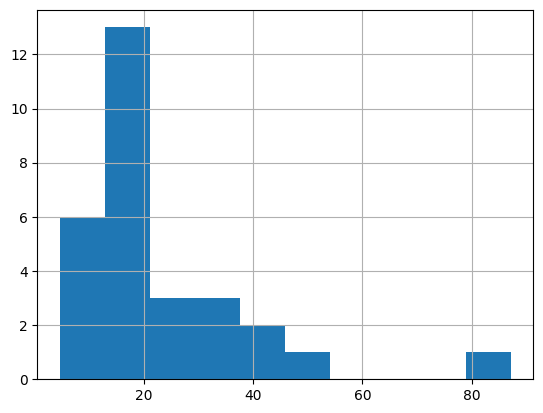

In [23]:
# want to do a histogram?
df_mult0[idx]['ev_ebitda'].hist();

Use what we've done so far to do the following:

1. Identify a set of very poorly performing companies (by financial metrics you prefer) and among those, identify one or more that you think is a BUY or SELL
2. Repeat, but filter for top performers.
In both cases, plot the distribtuion of the multiples to help make your case. 

Submit TWO Jupyter notebooks with your analysis

In [24]:
# identify poor performing companies by using the 25th percentile of gross profit,profit margin, 
# return on capital, ebitda margin, and ebitda
df_mult0['ebitda'].describe()

count     2182.000000
mean      1505.164027
std       4955.066497
min          0.028000
25%         67.225000
50%        265.200000
75%        912.900000
max      85159.000000
Name: ebitda, dtype: float64

In [25]:
# find percentiles for gross profit
df_mult0['gross_profit'].describe()

count      2182.000000
mean       2752.459860
std        8911.722846
min           0.594000
25%         170.900000
50%         555.800000
75%        1789.825000
max      152757.000000
Name: gross_profit, dtype: float64

In [26]:
# find percentiles for gross margin
df_mult0['gross_margin'].describe()

count    2182.000000
mean       42.137085
std        22.010103
min         0.819000
25%        24.700000
50%        38.550000
75%        56.975000
max       100.700000
Name: gross_margin, dtype: float64

In [27]:
# find percentiles for roc
df_mult0['roc'].describe()

count    2182.000000
mean       11.330652
std        92.016274
min         0.014000
25%         3.140000
50%         5.630000
75%         9.467500
max      3667.700000
Name: roc, dtype: float64

In [28]:
# find percentiles for ebitda margin
df_mult0['ebitda_margin'].describe()

count    2182.000000
mean       21.013721
std        16.261504
min         0.065484
25%         9.527500
50%        16.350000
75%        28.100000
max       131.700000
Name: ebitda_margin, dtype: float64

In [29]:
poor_ebitda = (df_mult0.ebitda < 67.225)
poor_profitmargin = (df_mult0.gross_margin < 24.7)
poor_profit = (df_mult0.gross_profit < 170.9)
poor_roc = (df_mult0.roc < 3.14)
poor_ebitdamargin = (df_mult0.ebitda_margin < 9.5275) 

# these are all boolean conditions, so we just use AND to combine them
poor = poor_ebitda & poor_profitmargin & poor_profit & poor_roc & poor_ebitdamargin

# finding the companies that are below the 25th percentile for each criteria
df_mult0.loc[poor,['ebitda','gross_margin','gross_profit','roc','ebitda_margin']].describe()

,ebitda,gross_margin,gross_profit,roc,ebitda_margin
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,15.297766,15.500766,48.502344,1.307078,4.670297
std,15.266594,6.317849,44.528196,0.844749,2.350578
min,0.220000,0.819000,1.980000,0.026000,0.370000
25%,3.735000,10.725000,14.350000,0.537500,2.877500
50%,9.920000,16.150000,31.200000,1.335000,4.430000
75%,21.375000,20.425000,71.625000,2.000000,5.762500
max,65.900000,24.600000,167.300000,3.060000,9.510000


In [30]:
df_mult0[poor]['ev_ebitda'].describe()

count     64.000000
mean      34.629982
std       45.623790
min        4.074074
25%       13.472575
50%       20.670587
75%       34.099412
max      291.362229
Name: ev_ebitda, dtype: float64

In [31]:
df_mult0[poor].sort_values(by='ev_ebitda', ascending = False)

,name,comp_type,exchange,industry,sector,marketcap,total_debt,shrout,revenue,gross_profit,...,tev,gRev1yr,gRev3yr,ebit_margin,ebitda_margin,gross_margin,roe,roc,altman,ev_ebitda
ex:tick,,,,,,,,,,,,,,,,,,,,,
NasdaqGS:PLMR,"Palomar Holdings, Inc. (NasdaqGS:PLMR)",Public Company,Nasdaq Global Select (NasdaqGS),Property and Casualty Insurance,Financials,1912.7,3.01,25.60,168.5,8.39,...,1882.2,48.70,41.50,3.690,3.83,4.98,2.15,1.330,NaN,291.362229
NasdaqGM:CARA,"Cara Therapeutics, Inc. (NasdaqGM:CARA)",Public Company,Nasdaq Global Market (NasdaqGM),Pharmaceuticals,Health Care,1370.1,5.28,49.90,135.1,27.20,...,1123.9,579.30,429.30,3.990,4.14,20.20,3.86,1.510,18.900,201.055456
NasdaqCM:CDMO,"Avid Bioservices, Inc. (NasdaqCM:CDMO)",Public Company,Nasdaq Capital Market (NasdaqCM),Biotechnology,Health Care,1213.5,21.60,60.80,80.8,19.90,...,1164.2,25.90,7.76,5.360,9.51,24.60,6.72,3.060,-0.557,151.588542
NasdaqCM:DJCO,Daily Journal Corporation (NasdaqCM:DJCO),Public Company,Nasdaq Capital Market (NasdaqCM),Publishing,Communication Services,434.5,16.90,1.38,48.7,10.00,...,181.2,-2.44,5.34,2.840,3.89,20.50,27.80,0.430,4.300,95.873016
NasdaqCM:TSRI,"TSR, Inc. (NasdaqCM:TSRI)",Public Company,Nasdaq Capital Market (NasdaqCM),IT Consulting and Other Services,Information Technology,17.1,7.29,1.96,59.5,9.62,...,17.2,-1.67,-3.31,0.282,0.37,16.20,-12.70,1.070,4.860,78.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NasdaqCM:ALTO,"Alto Ingredients, Inc. (NasdaqCM:ALTO)",Public Company,Nasdaq Capital Market (NasdaqCM),Oil and Gas Refining and Marketing,Energy,421.8,108.20,73.20,897.0,52.90,...,482.4,-37.00,-18.10,2.330,5.70,5.89,-6.61,2.900,0.793,9.440313
NasdaqGM:ALJJ,"ALJ Regional Holdings, Inc. (NasdaqGM:ALJJ)",Public Company,Nasdaq Global Market (NasdaqGM),Data Processing and Outsourced Services,Information Technology,66.0,141.80,42.30,418.5,80.10,...,205.2,19.00,6.75,0.791,5.63,19.10,-137.80,1.220,0.364,8.694915
NasdaqCM:APWC,Asia Pacific Wire & Cable Corporation Limited ...,Public Company,Nasdaq Capital Market (NasdaqCM),Electrical Components and Equipment,Industrials,50.9,18.70,13.80,295.7,33.70,...,96.8,-17.20,-9.14,2.980,4.55,11.40,2.05,2.260,2.110,7.223881


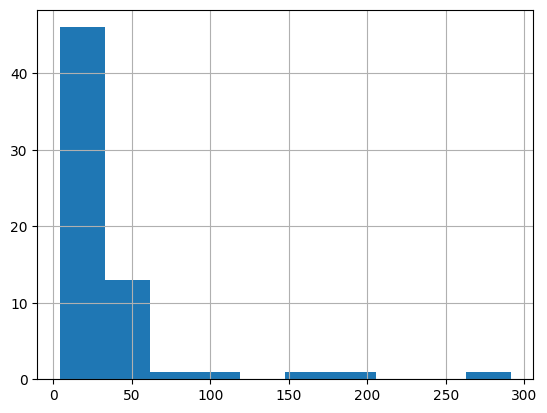

In [32]:
# plot multiples for poor performing companies
df_mult0[poor]['ev_ebitda'].hist();

Now, we are going to identify the high performing companies using the same categories for criteria. 

In [33]:
# finding the companies performing well
# characterized as the companies above the 75th percentile for each criteria
good_ebitda = (df_mult0.ebitda > 912.9)
good_profitmargin = (df_mult0.gross_margin > 56.975)
good_profit = (df_mult0.gross_profit > 1789.825)
good_roc = (df_mult0.roc > 9.4675)
good_ebitdamargin = (df_mult0.ebitda_margin > 28.1) 

good = good_ebitda & good_profitmargin & good_profit & good_roc & good_ebitdamargin

# finding the companies that are above the 75th percentile for each criteria
df_mult0.loc[good,['ebitda','gross_margin','gross_profit','roc','ebitda_margin']].describe()

,ebitda,gross_margin,gross_profit,roc,ebitda_margin
count,50.000000,50.000000,50.00000,50.000000,50.000000
mean,9080.932000,71.244000,15156.19400,17.436400,43.392000
std,12081.796984,10.832833,19225.67969,7.082456,10.101765
min,924.700000,58.100000,1790.70000,9.520000,28.200000
25%,2255.625000,62.700000,3372.05000,13.325000,34.375000
50%,4149.050000,69.400000,7087.50000,15.150000,44.400000
75%,12487.000000,77.850000,19230.00000,20.250000,49.975000
max,71687.000000,100.000000,104774.00000,50.200000,68.600000


In [34]:
df_mult0[good].sort_values(by='ev_ebitda', ascending = False)

,name,comp_type,exchange,industry,sector,marketcap,total_debt,shrout,revenue,gross_profit,...,tev,gRev1yr,gRev3yr,ebit_margin,ebitda_margin,gross_margin,roe,roc,altman,ev_ebitda
ex:tick,,,,,,,,,,,,,,,,,,,,,
NasdaqGS:NVDA,NVIDIA Corporation (NasdaqGS:NVDA),Public Company,Nasdaq Global Select (NasdaqGS),Semiconductors,Information Technology,355061.6,7718.0,620.0,16675.0,10557.0,...,351218.6,52.700,19.700,28.3,34.9,63.3,29.800,15.00,15.40,60.357209
NasdaqGS:INTU,Intuit Inc. (NasdaqGS:INTU),Public Company,Nasdaq Global Select (NasdaqGS),Application Software,Information Technology,112635.8,2821.0,273.8,7717.0,6377.0,...,112718.8,8.280,11.100,27.4,30.1,82.6,27.700,16.30,10.70,48.564757
NasdaqGS:ADBE,Adobe Inc. (NasdaqGS:ADBE),Public Company,Nasdaq Global Select (NasdaqGS),Application Software,Information Technology,239586.1,4707.0,479.3,13682.0,11965.0,...,239330.1,17.300,21.100,34.7,39.0,87.5,46.400,17.80,13.40,44.877199
NYSE:MA,Mastercard Incorporated (NYSE:MA),Public Company,New York Stock Exchange (NYSE),Data Processing and Outsourced Services,Information Technology,375232.7,13523.0,993.4,15301.0,15301.0,...,377809.7,-9.370,6.980,53.3,57.1,100.0,102.500,28.90,10.00,43.217765
NYSE:EW,Edwards Lifesciences Corporation (NYSE:EW),Public Company,New York Stock Exchange (NYSE),Health Care Equipment,Health Care,52350.6,694.9,622.0,4386.3,3305.7,...,51642.9,0.881,8.490,30.0,32.5,75.4,18.900,16.30,13.10,36.281369
NasdaqGS:XLNX,"Xilinx, Inc. (NasdaqGS:XLNX)",Public Company,Nasdaq Global Select (NasdaqGS),Semiconductors,Information Technology,32565.4,2043.7,245.3,3052.8,2138.0,...,31284.7,-5.630,7.780,25.0,31.3,70.0,23.700,11.10,6.67,32.738280
NYSE:V,Visa Inc. (NYSE:V),Public Company,New York Stock Exchange (NYSE),Data Processing and Outsourced Services,Information Technology,471696.7,21055.0,2137.3,21479.0,20760.0,...,478393.7,-8.700,4.620,65.0,68.6,96.7,29.400,15.70,7.12,32.464285
NYSE:BF.B,Brown-Forman Corporation (NYSE:BF.B),Public Company,New York Stock Exchange (NYSE),Distillers and Vintners,Consumer Staples,33211.4,2659.0,478.7,3358.0,2049.0,...,34764.4,-1.180,1.510,31.9,34.2,61.0,40.700,14.10,7.10,30.308980
NYSE:ZTS,Zoetis Inc. (NYSE:ZTS),Public Company,New York Stock Exchange (NYSE),Pharmaceuticals,Health Care,75997.7,7440.0,475.0,6675.0,4637.0,...,79835.7,6.630,7.950,34.5,40.4,69.5,50.500,14.00,6.22,29.612648


In [35]:
# look at the distribution of multiples in the high performing category
df_mult0[good]['ev_ebitda'].describe()

count    50.000000
mean     20.165989
std      12.047911
min       3.824153
25%      11.515431
50%      17.505836
75%      25.991793
max      60.357209
Name: ev_ebitda, dtype: float64

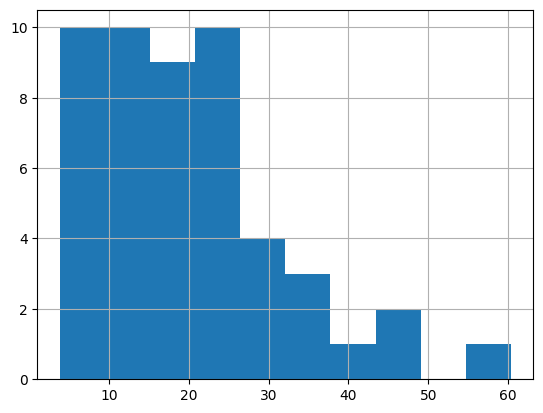

In [36]:
df_mult0[good]['ev_ebitda'].hist();

In [37]:
# Identify two high-performing firms to buy
Merck & Co.
Nvidia

# Identify two low-performing firms to sell
Daily Journal Corporation 
Cara Therapeutics, Inc.

SyntaxError: invalid syntax (3308737861.py, line 2)

We recommend selling Daily Journal Corporation (NasdaqCM:DJCO) and Cara Therapeutics, Inc. (NasdaqGM:CARA). We selected these companies based on poor key financial health criteria, coupled with having a high EV/EBITDA multiple, and negative industry outlooks. Poor performing companies were in the bottom quartile of EBITDA, profit margin, profit, roc, and EBITDA margin, within the entire dataset. Daily Journal has an EV/EBITDA multiple of 95.87, the fourth highest in the poor performing quartile – indicating a high valuation with comparatively low EBITDA. Furthermore, as a news publishing company operating on a regional basis, we see strong industry headwinds of full digitization as an obstacle to company growth (CFRA Equity Research: DJCO, 11/20/21). Cara Therapeutics has an EV/EBITDA multiple of 201.06, the second highest in the poor performing quartile. We see the same trend here as we do with Daily Journal Corporation, only more exacerbated. Additionally, recent company news reports revealed abnormalities for patients involved in their clinical trials for Oral KORUSVA (Company Press Release: CARA, 4/29/21). Specifically, we believe that the company faces inconsistent growth, in addition to poor operating and return on investment margins (Argus Research Report: CARA, 11/10/21). 

We recommend buying Merck &amp; Co (NYSE: MRK) and Nvidia Corporation (NasdaqGS: NVDA). We selected these companies because they have a relatively lower (hence healthier) EV/EBITDA multiple, while also they are high performing so we would recommend buying those stocks. The division of EV by EBITDA gives a good measure of value. It estimates the number of years in which the business will repay its acquisition cost to the buyer through its earnings. Merck&amp;Co has an EV/EBITDA multiple of 11.35, the 13th from the end in our data frame. This indicates that although it's not at the top of the high performers group, it's still considered to be a buy since it has a good EV/EBITDA compared to the firms in it's industry. Nvidia has a high EV/EBITDA multiple of 60.36, which should be encouraging to a potential investor due to previously discussed positive performance implications. This is the highest multiple in the top performing companies and represents a company with ample room for future growth. Nvidia is an artificial intelligence company with promising future earnings expectations based on our multiple analysis. Following the pandemic chip storage, the demand for Nvidia's chips for self-driving cars sky rocketed. The company is looking to expand chip supply to other industries such as healthcare and entertainment. (Investor's Business Daily: NVDA, 11/18/21). 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7bc46ca1-d592-45ab-a6c1-8cae6d45d82e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>